In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#importing the data
with open ('valid.p','rb') as valid:
    valid = pickle.load(valid)
    
with open ('train.p','rb') as train:
    train = pickle.load(train)
    
with open('test.p','rb') as test: 
    test = pickle.load(test)

In [60]:
X_train, Y_train = train['features'], train['labels']
X_valid, Y_valid = valid['features'], valid['labels']
X_test, Y_test = test['features'], test['labels']

In [61]:
X_train.shape

(34799, 32, 32, 3)

class:  0


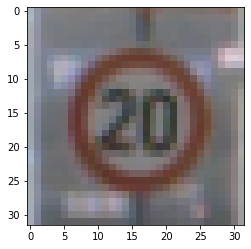

In [62]:
i = 10002
plt.imshow(X_train[i])
print('class: ' ,Y_train[i])

class:  3
-------------------------------
class:  25
-------------------------------
class:  16
-------------------------------


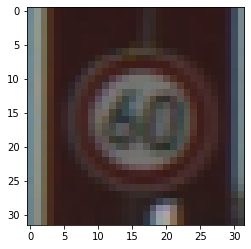

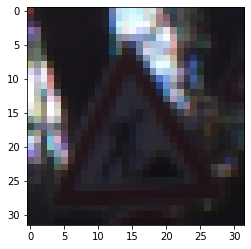

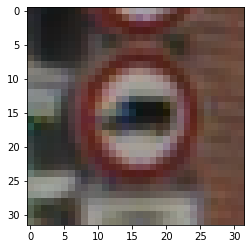

In [63]:
from random import randint
for n in range(3):
    i = randint(0,34000)
    plt.figure()
    plt.imshow(X_train[i])
    print('class: ', Y_train[i])
    print('-------------------------------')
    

In [64]:
#shuffling all the data present in the dataset
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train)

In [65]:
#convert all the colorful image into black and white image
X_train_gray = np.sum(X_train/3, axis= 3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_valid_gray = np.sum(X_valid/3, axis =3 , keepdims = True)


In [66]:
X_train_gray.shape,X_test_gray.shape,X_valid_gray.shape,Y_test_grey.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

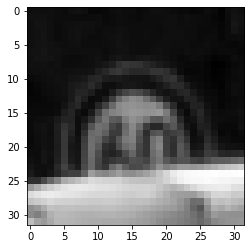

In [67]:
i = 200
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')


In [68]:
#normalizing all the greyed imaged
X_train_gray_norm = (X_train_gray-128)/128
X_valid_gray_norm = (X_valid_gray-128)/128
X_test_gray_norm = (X_test_gray-128)/128


In [69]:
X_train_gray_norm.shape

(34799, 32, 32, 1)

In [70]:
#displaying all the images with its types: original colored, grey and at last normalized

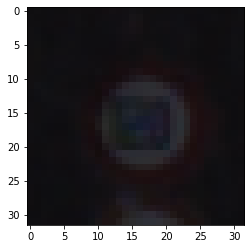

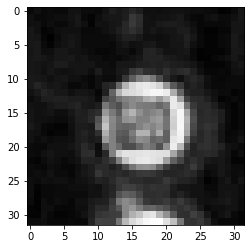

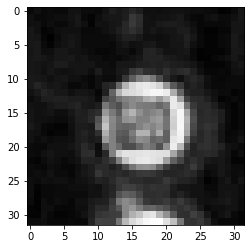

In [71]:
n = 610
plt.imshow(X_train[n])
plt.figure()
plt.imshow(X_train_gray[n].squeeze(),cmap='gray')
plt.figure()
plt.imshow(X_train_gray_norm[n].squeeze(),cmap='gray')

In [72]:
## improting the models 


In [73]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, AveragePooling2D, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam

In [74]:
#creating the model

In [75]:
cnn = Sequential()
#first convolution
cnn.add(Conv2D(filters= 6, input_shape=(32,32,1), kernel_size=(5,5), activation='relu'))
#first subsampling
cnn.add(AveragePooling2D())

#second convolution
cnn.add(Conv2D(filters=16, kernel_size=(5,5),activation='relu'))
cnn.add(AveragePooling2D())

#flattern layer
cnn.add(Flatten())

# first fully connected layer
cnn.add(Dense(120, activation='relu'))

#second fully connected layer
cnn.add(Dense(84, activation='relu'))

#last fully conndected layer
cnn.add(Dense(43, activation='softmax'))




In [76]:
cnn.compile(loss='sparse_categorical_crossentropy',optimizer = Adam(lr=0.001), metrics=['accuracy'])

In [77]:
#training the data
history = cnn.fit(x= X_train_gray_norm,y = Y_train,
        batch_size=500,
        epochs = 20,
       validation_data=(
           X_valid_gray_norm,Y_valid))

Epoch 1/20
70/70 [==============================] - 13s 157ms/step - loss: 3.4308 - accuracy: 0.1047 - val_loss: 2.7350 - val_accuracy: 0.2864
Epoch 2/20
70/70 [==============================] - 11s 152ms/step - loss: 2.0312 - accuracy: 0.4474 - val_loss: 1.5342 - val_accuracy: 0.5197
Epoch 3/20
70/70 [==============================] - 11s 151ms/step - loss: 1.1160 - accuracy: 0.6691 - val_loss: 1.1364 - val_accuracy: 0.6714
Epoch 4/20
70/70 [==============================] - 11s 151ms/step - loss: 0.7563 - accuracy: 0.7841 - val_loss: 0.8979 - val_accuracy: 0.7308
Epoch 5/20
70/70 [==============================] - 11s 150ms/step - loss: 0.5797 - accuracy: 0.8352 - val_loss: 0.7259 - val_accuracy: 0.7853
Epoch 6/20
70/70 [==============================] - 11s 152ms/step - loss: 0.4464 - accuracy: 0.8780 - val_loss: 0.6727 - val_accuracy: 0.8111
Epoch 7/20
70/70 [==============================] - 11s 151ms/step - loss: 0.3822 - accuracy: 0.8946 - val_loss: 0.6219 - val_accuracy: 0.8179

In [78]:
Y_test.shape, X_test_gray_norm.shape

((12630,), (12630, 32, 32, 1))

In [83]:
score = cnn.evaluate(X_test_gray_norm,  Y_test)
print(score[1])

395/395 [==============================] - 3s 9ms/step - loss: 0.9249 - accuracy: 0.8576
0.8575613498687744


In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [100]:
loss = history.history['loss']
accuracy = history.history['accuracy'] 
validation_loss = history.history['val_loss'] 
validation_accuracy = history.history['val_accuracy']  

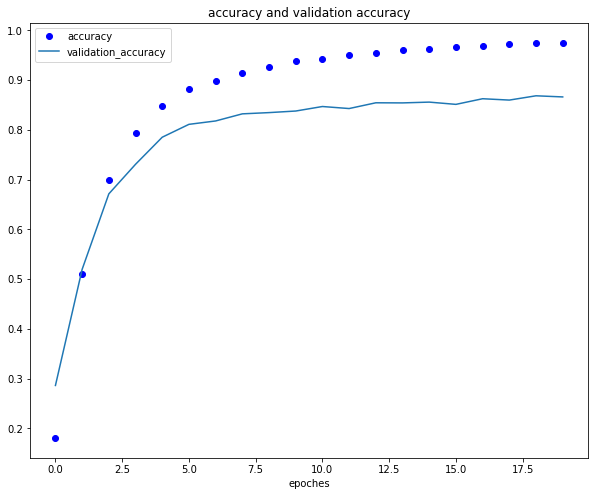

In [122]:
#plotting the accuracy 
epoches = range(len(accuracy))
plt.figure(figsize= (10,8))
plt.plot(epoches,accuracy, 'bo', label = 'accuracy')
plt.plot(epoches,validation_accuracy, label = 'validation_accuracy')
plt.xlabel('epoches')
plt.title('accuracy and validation accuracy')
plt.legend()


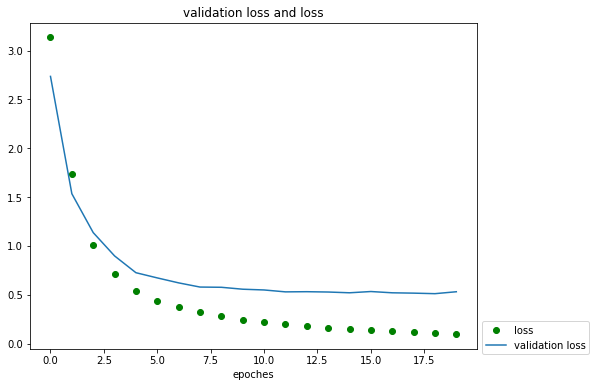

In [124]:
#plotting loss according to the eopches
epoches = range(len(loss))
plt.figure(figsize= (8,6))
plt.plot(epoches,loss, 'go', label = 'loss')
plt.plot(epoches,validation_loss, label = 'validation loss')
plt.xlabel('epoches')
plt.title('validation loss and loss')
plt.legend(bbox_to_anchor=(1,.1))

In [125]:
predicted_classes = cnn.predict_classes(X_test_gray_norm)

C:\Users\cousi\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Text(195.0, 0.5, 'predicted class')

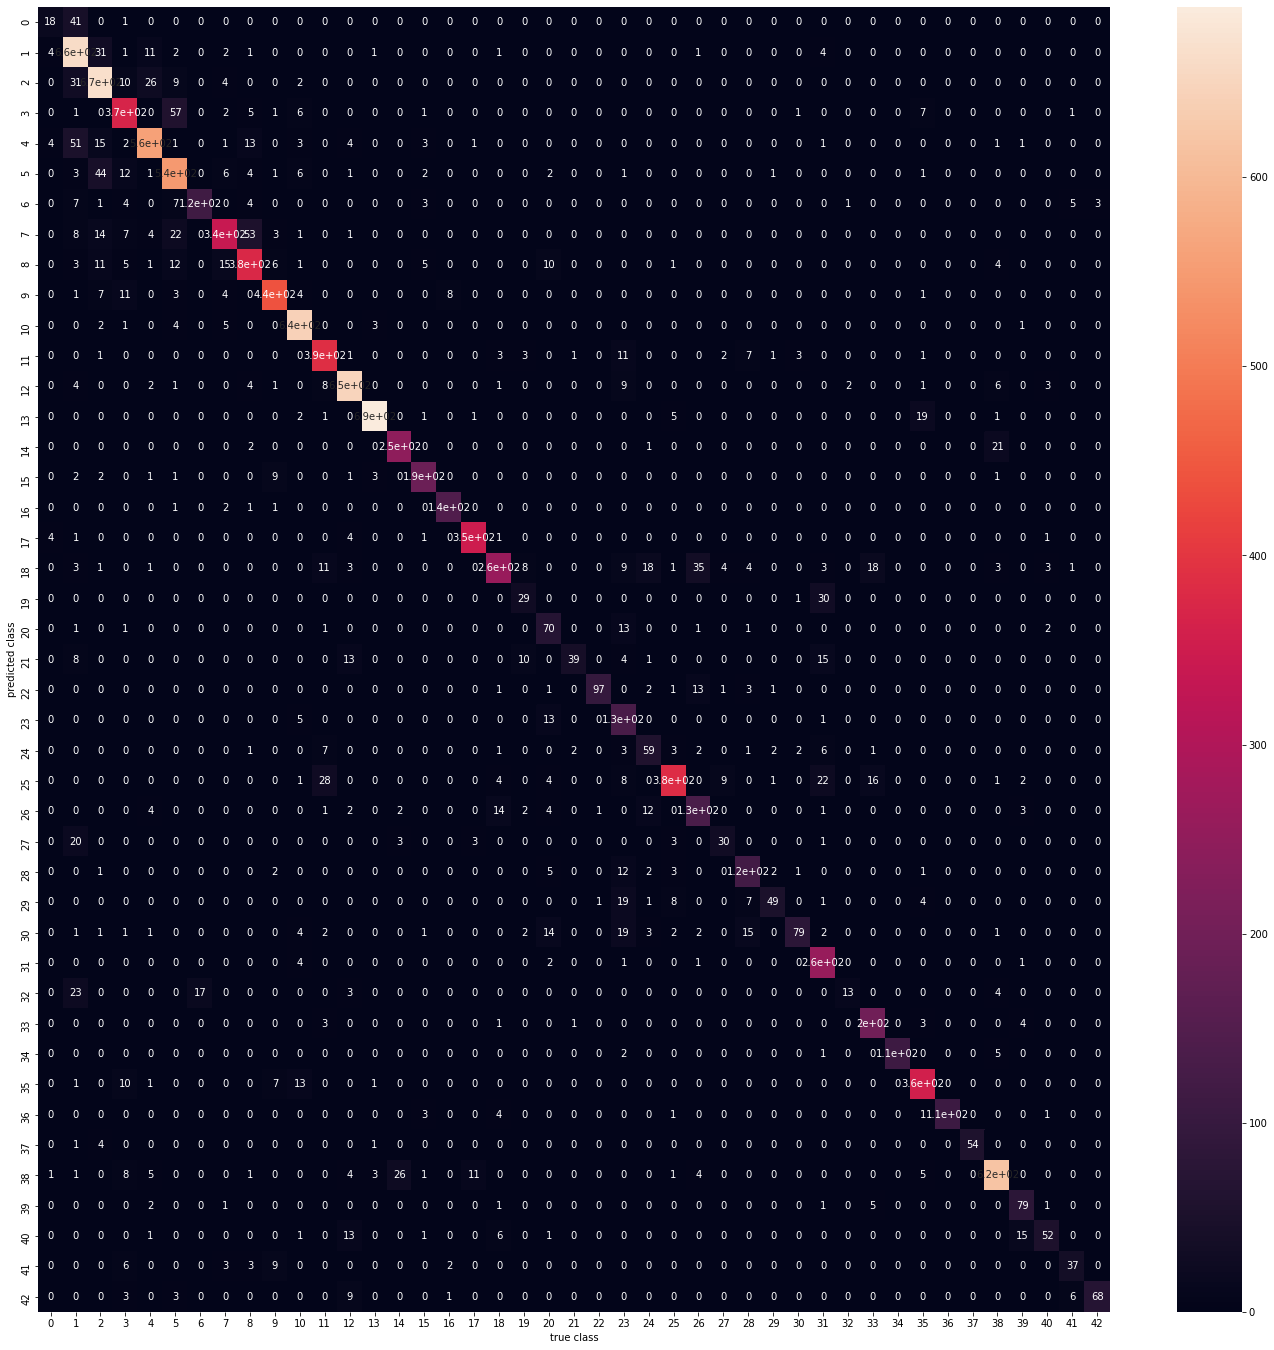

In [134]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (24,24))
cm  = confusion_matrix(Y_test,predicted_classes)
sns.heatmap(cm,annot = True )
plt.xlabel("true class")
plt.ylabel('predicted class')

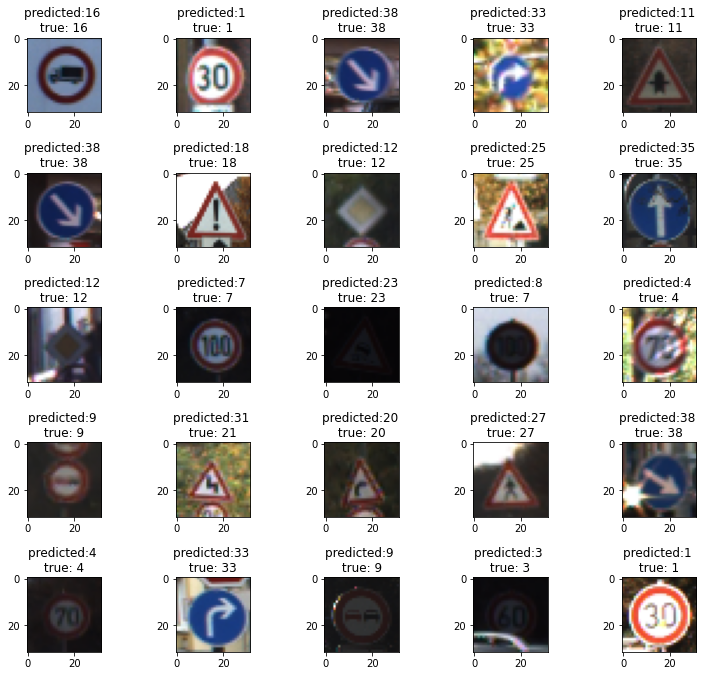

In [151]:
#creating the subplots where first two parameters are size of the plots
fig, axes = plt.subplots(5,5, figsize=(12,12))
axes = axes.ravel()
#pringing the 25 figures with its real and predicted class
for i in range(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('predicted:{} \n true: {} '.format(predicted_classes[i] ,Y_test[i]))

#for adjusting the space between subplots
plt.subplots_adjust(wspace = 1)